# Import Libraries and Data

In [23]:
import helper

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def simple_interaction_feature(df, list_of_old_features):
    new_feature_val = 1
    for feature in list_of_old_features:
        new_feature_val = new_feature_val * df[feature]
    return new_feature_val

In [26]:
real_estate = pd.read_csv('../datasets/processed_train.csv')

In [27]:
real_estate['garage_score'] = simple_interaction_feature(real_estate, ['garage_area','garage_qual','garage_cars','garage_cond'])

In [28]:
real_estate = real_estate[['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'exter_qual', 'bsmt_qual', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area',
       'kitchen_qual', 'saleprice', 'garage_score']]

In [29]:
dummy_neighborhood = pd.read_csv('../datasets/dummies/neighborhood_dummies.csv')

In [30]:
real_estate = pd.concat([real_estate,dummy_neighborhood],axis=1)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [32]:
X = real_estate.drop(columns=['saleprice'])
y = real_estate['saleprice']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   test_size = .2)

In [35]:
column_names = X_train.columns

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lasso = Lasso()
ridge = Ridge()

# Ridge

In [38]:
ridge_alphas = np.logspace(0,5,100)
ridge_cv = RidgeCV(alphas = ridge_alphas, scoring = 'r2', cv=5)
ridge_cv.fit(X_train, y_train);

In [39]:
ridge_cv;

In [40]:
ridge_cv.alpha_

1.0

In [41]:
ridge = Ridge()

In [42]:
ridge.fit(X_train, y_train)

Ridge()

In [43]:
neighborhood_coefficients = [ {'name':n,'coef':x} for n, x in list(zip(X_train.columns,ridge.coef_)) if ('neighborhood') in n]

In [44]:
neighborhood_coefficients = pd.DataFrame(neighborhood_coefficients)

In [45]:
neighborhood_coefficients = neighborhood_coefficients.sort_values('coef',ascending=False)

In [46]:
neighborhood_coefficients['name'] = neighborhood_coefficients['name'].str.replace('neighborhood_','')

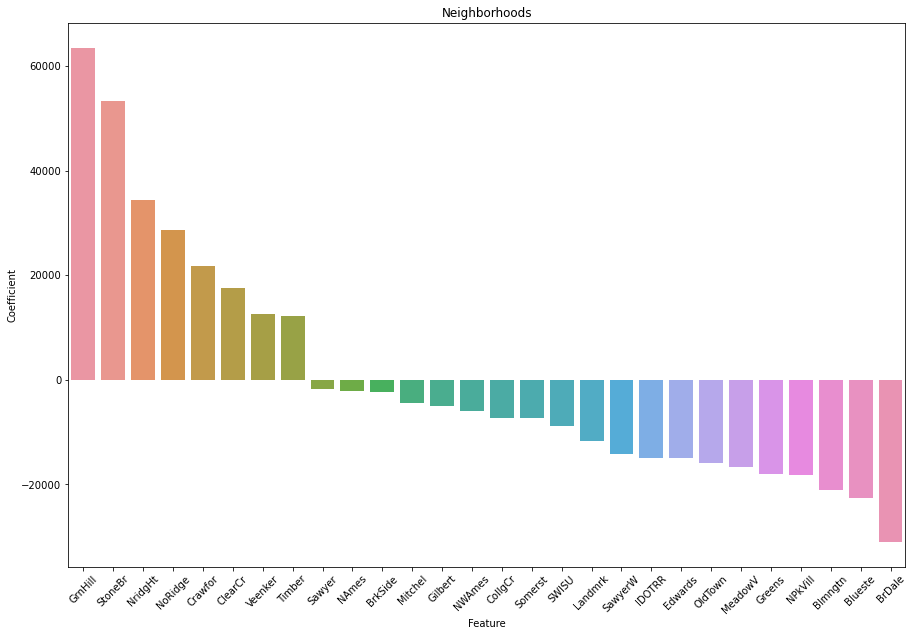

In [47]:
plt.figure(figsize = (15,10))
sns.barplot(data = neighborhood_coefficients,
            x = 'name',
            y = 'coef')

plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('Neighborhoods')
plt.xticks(rotation=45)

plt.savefig('Neighborhoods')

In [48]:
neighborhood_coefficients

,name,coef
10,GrnHill,63526.672375
25,StoneBr,53329.037358
19,NridgHt,34451.800466
18,NoRidge,28629.492497
6,Crawfor,21775.737551
4,ClearCr,17486.437526
27,Veenker,12615.073491
26,Timber,12214.810118
22,Sawyer,-1731.118669
15,NAmes,-2080.454032


In [49]:
other_coefficients = [{'coef':x,'name':n} for n, x in list(zip(X_train.columns,ridge.coef_)) if not ('neighborhood') in n]

In [50]:
other_coefficients

[{'coef': 10558.853342601898, 'name': 'overall_qual'},
 {'coef': 88.55995764682915, 'name': 'year_built'},
 {'coef': 138.69064349768132, 'name': 'year_remod/add'},
 {'coef': 24.6000118439344, 'name': 'mas_vnr_area'},
 {'coef': 10886.395266514071, 'name': 'exter_qual'},
 {'coef': 6874.123448759958, 'name': 'bsmt_qual'},
 {'coef': 3.2665175848441175, 'name': 'total_bsmt_sf'},
 {'coef': 14.219521790409344, 'name': '1st_flr_sf'},
 {'coef': 37.36559578060618, 'name': 'gr_liv_area'},
 {'coef': 11019.570539565717, 'name': 'kitchen_qual'},
 {'coef': 1.8550221990653688, 'name': 'garage_score'}]

In [51]:
 other_coefficients = pd.DataFrame(other_coefficients)

In [52]:
other_coefficients_1 = other_coefficients.iloc[[0,4,5,9],:]

In [53]:
other_coefficients_2 = other_coefficients.iloc[[8,6],:]

In [54]:
other_coefficients_2

,coef,name
8,37.365596,gr_liv_area
6,3.266518,total_bsmt_sf


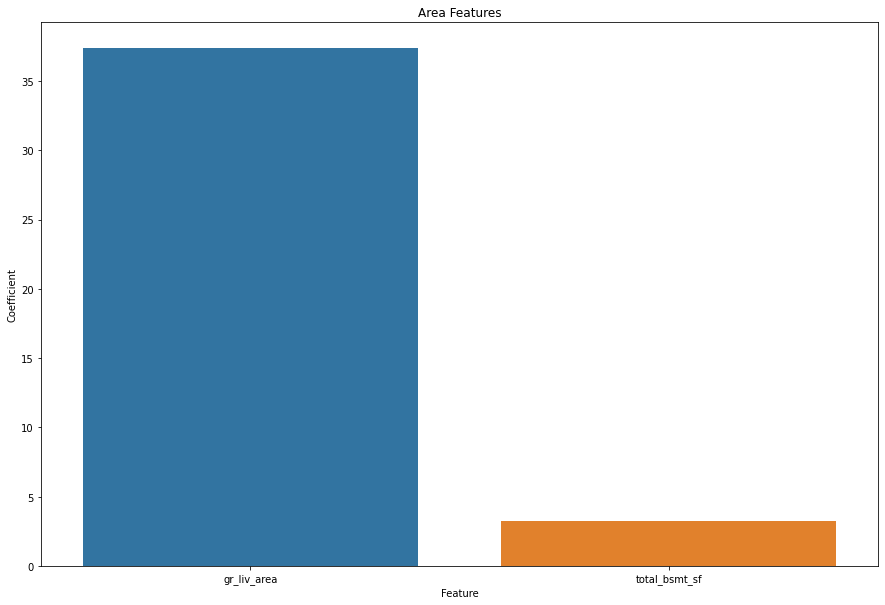

In [55]:
plt.figure(figsize = (15,10))
sns.barplot(data = other_coefficients_2,
            x = 'name',
            y = 'coef')

plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('Area Features')

plt.savefig('Area')

In [56]:
other_coefficients_2

,coef,name
8,37.365596,gr_liv_area
6,3.266518,total_bsmt_sf


In [57]:
other_coefficients

,coef,name
0,10558.853343,overall_qual
1,88.559958,year_built
2,138.690643,year_remod/add
3,24.600012,mas_vnr_area
4,10886.395267,exter_qual
5,6874.123449,bsmt_qual
6,3.266518,total_bsmt_sf
7,14.219522,1st_flr_sf
8,37.365596,gr_liv_area
9,11019.570540,kitchen_qual


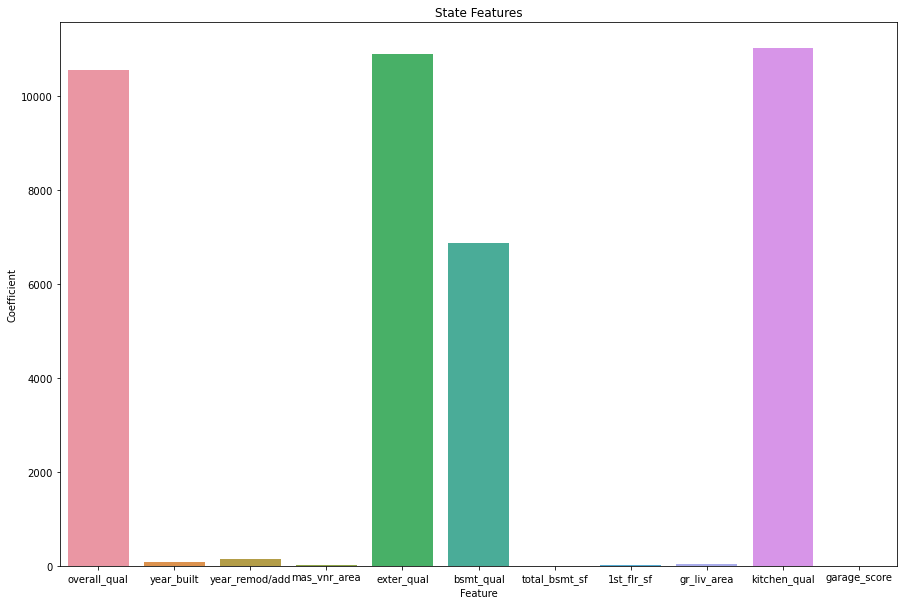

In [58]:
plt.figure(figsize = (15,10))
sns.barplot(data = other_coefficients,
            x = 'name',
            y = 'coef')

plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('State Features')

plt.savefig('state_features')

In [59]:
scores = cross_val_score(ridge, X_train, y_train, cv=5)

In [60]:
scores.mean()

0.8244030697402728

In [61]:
predicts = ridge.predict(X_test)

In [62]:
r2_score(y_test,predicts)

0.8643963644186137

In [63]:
mean_squared_error(y_test,predicts,squared=False)

28384.698374851258

In [64]:
mean_squared_error(y_test,predicts)

805691101.8312837

# Lasso

In [65]:
lasso_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas=lasso_alphas,
                  cv = 5,
                  n_jobs=-1,
                  max_iter = 100_000)

lasso_cv.fit(X_train, y_train);

In [66]:
lasso_cv.alpha_

1.0

In [67]:
lasso_cv.score(X_train, y_train)

0.8424384113257462

In [68]:
lasso_cv.score(X_test, y_test)

0.8635506977511423

In [69]:
predicts = lasso_cv.predict(X_test)
r2_score(y_test,predicts)

0.8635506977511423

In [70]:
mean_squared_error(y_test,predicts,squared=False)

28473.068739401966

# Linear

In [71]:
linreg = LinearRegression()

In [72]:
linreg.fit(X_train, y_train)

LinearRegression()

In [73]:
linreg.score(X_train, y_train)

0.8424391791307976

In [74]:
linreg.score(X_test, y_test)

0.8634806205592892

In [75]:
mean_squared_error(y_test, linreg.predict(X_test),squared=False)

28480.37935421282

In [77]:
list(zip(X_train.columns,linreg.coef_))

[('overall_qual', 10473.291639488461),
 ('year_built', 79.9295482732932),
 ('year_remod/add', 137.45247188496307),
 ('mas_vnr_area', 24.451957224250542),
 ('exter_qual', 10575.711395593822),
 ('bsmt_qual', 7021.4962632434535),
 ('total_bsmt_sf', 3.4168080423089897),
 ('1st_flr_sf', 13.729240330216205),
 ('gr_liv_area', 37.278795852453825),
 ('kitchen_qual', 10914.708160136173),
 ('garage_score', 1.860077998482449),
 ('neighborhood_Blmngtn', -21839.313446877375),
 ('neighborhood_Blueste', -26840.42723472683),
 ('neighborhood_BrDale', -33803.260354693746),
 ('neighborhood_BrkSide', -3252.260548491978),
 ('neighborhood_ClearCr', 17989.020250776895),
 ('neighborhood_CollgCr', -7212.241256950574),
 ('neighborhood_Crawfor', 21752.243493478127),
 ('neighborhood_Edwards', -15571.905526027074),
 ('neighborhood_Gilbert', -5220.564931529876),
 ('neighborhood_Greens', -26860.320223113496),
 ('neighborhood_GrnHill', 95931.61600003064),
 ('neighborhood_IDOTRR', -16113.773365606949),
 ('neighborhood_